# Refinitiv Data Platform - Search Function

This notebook demonstrates how to use the Search Capability within the Refinitiv Data Platform. The Search API powers many of the Search applications backend within Eikon/Refinitiv Workspace.

The Search service features several endpoints/functions to guide you in your search process.

    rdp.search: The search service identifies a matching set of documents which satisfy the caller's criteria, sorts it, and selects a subset of the matches to return as the result set.

    rdp.lookup: Finds single best match for each of a list of symbol terms in a given symbology

    rdp.metadata: Complements search and lookup. This service tells you what properties are available and what capabilities they have

    rdp.health: Tests whether the search family is in good shape.

# Import the RDP Library and Connect to Eikon/RWS/

In [1]:
import refinitiv.dataplatform as rdp

rdp.open_desktop_session('DEFAULT_CODE_BOOK_APP_KEY')

## Search
The search service identifies a matching set of documents which satisfy the caller's criteria, sorts it, and selects a subset of the matches to return as the result set. Each step can be controlled via parameters.

By default the fields BusinessEntity, PI, PermID, DocumentTitle, and RIC will be returned, but this can be modified to display fields of interest to you. To learn more about which fields can be pulled, jump to the Metadata service portion of this notebook.

#### Simple Search

In [2]:
df = rdp.search('TSLA')
df

,DocumentTitle,BusinessEntity,PermID,RIC,PI
0,"Tesla Inc, Public Company",ORGANISATION,<NA>,<NA>,7946087
1,"Transilvania Leasing si Credit IFN SA, Public ...",ORGANISATION,<NA>,<NA>,22507471
2,"Tesla Inc, Ordinary Share, NASDAQ Global Selec...",QUOTExEQUITY,21475021920,TSLA.O,72106021
3,"Transilvania Leasing si Credit IFN SA, Ordinar...",QUOTExEQUITY,21526324324,ROTSLA.BX,136552426
4,"Tesla Inc, Depository Receipt, BM&F Bovespa SA...",QUOTExEQUITY,21592659789,TSLA34.SA,233198638
5,"Tesla Inc, Depository Receipt, Bolsa de Comerc...",QUOTExEQUITY,25727372224,TSLA.BA,366529667
6,"Graniteshares 3X Short Tesla Daily ETP, Exchan...",QUOTExFUND,21757706985,3STS.L,444793487
7,OPRA Tesla Motors Equity Options 360 Put Oct 2...,QUOTExEQUITY,21766325185,TSLAV092036000.U,455707729
8,OPRA Tesla Motors Equity Options 360 Call Oct ...,QUOTExEQUITY,21766329527,TSLAJ092036000.U,455712426
9,OPRA Tesla Motors Equity Options 365 Call Oct ...,QUOTExEQUITY,21766330385,TSLAJ092036500.U,455713327


### Search with Parameters

Search can be performed using a Query, a natural language-like search, or using Filters, a structured search.

When using parameters, it is important to specify the view parameter to narrow your universe, By default it is set to 'SearchAll', which will return results from all views.

The following views are available:

     - BondFutOptQuotes
     - CdsInstruments
     - CdsQuotes
     - CmoInstruments
     - CmoQuotes
     - CommodityQuotes
     - DealsMergersAndAcquisitions
     - DerivativeInstruments
     - DerivativeQuotes
     - EquityDerivativeInstruments
     - EquityDerivativeQuotes
     - EquityInstruments
     - EquityQuotes
     - FixedIncomeInstruments
     - FixedIncomeQuotes
     - FundQuotes
     - GovCorpInstruments
     - GovCorpQuotes
     - IndexInstruments
     - IndexQuotes
     - IndicatorQuotes
     - Instruments
     - IRDQuotes
     - LoanInstruments
     - LoanQuotes
     - MoneyQuotes
     - MortgageInstruments
     - MortQuotes
     - MunicipalInstruments
     - MunicipalQuotes
     - Organisations
     - People
     - PhysicalAssets
     - Quotes
     - QuotesAndSTIRs
     - SearchAll
     - STIRs
     - VesselPhysicalAssets
     - YieldCurveContQuotes


### Queried Search Example

In [3]:
rdp.search(
    view = rdp.SearchViews.People,
    query="ceo")

,BusinessEntity,PermID,DocumentTitle,PI
0,PERSON,34413262612,Satya Nadella - Microsoft Corp - Chief Executi...,34413262612
1,PERSON,34413199178,Tim D. Cook - Apple Inc - Chief Executive Offi...,34413199178
2,PERSON,34415676965,Jeff P. Bezos - Amazon.com Inc - Chairman of t...,34415676965
3,PERSON,34414328620,Sundar Pichai - Alphabet Inc - Chief Executive...,34414328620
4,PERSON,34415691107,Mark Zuckerberg - Facebook Inc - Chairman of t...,34415691107
5,PERSON,34413152671,Warren Edward Buffett - Berkshire Hathaway Inc...,34413152671
6,PERSON,34413589173,Daniel Zhang - Alibaba Group Holding Ltd - Cha...,34413589173
7,PERSON,34413474878,Huateng Ma - Tencent Holdings Ltd - Executive ...,34413474878
8,PERSON,34413189050,Al Francis Kelly - Visa Inc - Chairman of the ...,34413189050
9,PERSON,34413857376,Alex Gorsky - Johnson & Johnson - Chairman of ...,34413857376


### Structured Search
 
Structured search utilized the filter parameter. You can use the Metadata function to search for data items and values you can filter by for each view. See below for examples.



In [4]:
rdp.search(
    view = rdp.SearchViews.GovCorpInstruments,
    filter = "(CouponRate gt 2.0 and CouponRate lt 4.0)",
    top =1000)

,DocumentTitle,BusinessEntity,PermID,RIC,PI
0,"National Westminster Bank PLC, Other / Complex...",INSTRUMENTxFIXEDINCOMExGOVCORP,8590216754,GB001040421=,0x00024600018638fb
1,"Credit Industriel et Commercial SA, Other / Co...",INSTRUMENTxFIXEDINCOMExGOVCORP,8590369858,FR0000584377=,0x0002460002163464
2,"Credit Industriel et Commercial SA, Other / Co...",INSTRUMENTxFIXEDINCOMExGOVCORP,8590369885,FR0000165847=,0x00024600021a3569
3,"Bank of Scotland PLC, Other / Complex Floating...",INSTRUMENTxFIXEDINCOMExGOVCORP,8590314426,GB001011782=,0x0002a0000912962f
4,"Societe Generale SA, Other / Complex Floating ...",INSTRUMENTxFIXEDINCOMExGOVCORP,8590376495,FR001020498=,0x0002a0000912b009
...,...,...,...,...,...
995,"Lotte Capital Co Ltd, Plain Vanilla Fixed Coup...",INSTRUMENTxFIXEDINCOMExGOVCORP,<NA>,KR602969575=,0x00102c4253b10d91
996,"Itau CorpBanca Colombia SA, Certificate of Dep...",INSTRUMENTxFIXEDINCOMExGOVCORP,<NA>,COB06CD1W7R6=PIPC,0x00102c427b532375
997,"BNY Mellon NA, Certificate of Deposit, BKBML 2...",INSTRUMENTxFIXEDINCOMExGOVCORP,<NA>,05584CFG6=,0x00102c4374f715e9
998,"Banco Bilbao Vizcaya Argentaria Colombia SA, C...",INSTRUMENTxFIXEDINCOMExGOVCORP,<NA>,COB13CD0W392=PIPC,0x00102c44a2dc2224


# Metadata

The metadata service is intended to complement the search and lookup services. Many of the parameters for those services require the caller to specify document properties with which to do something - return this, filter on that, sort on the other. In many cases the parameter requires that the property have a certain capability - you can only filter on a Searchable property, you can only sort on a Sortable property and so on. This service tells you what properties are available and what capabilities they have.


The metadata function will return a boolean value for several columns, letting the user know that the parameter can be used to filter and organize your data to be used in the rdp.search parameters.

For example: Given the results of the get_search_metadata for the GovCorpInstruments view, we know that we can use the AccruedInterest parameter to in the filter parameter (because its value is True for searchable), sort, and navigators parameter. However, it cannot be used in the group by parameter.

In [5]:
rdp.get_search_metadata(view = rdp.SearchViews.GovCorpInstruments)

,,Type,Searchable,Sortable,Navigable,Groupable,Exact,Symbol
AccrualDate,AccrualDate,Date,True,True,True,False,False,False
AccruedInterest,AccruedInterest,Double,True,True,True,False,False,False
ActiveEstimatesExist,ActiveEstimatesExist,Boolean,True,False,False,False,False,False
AdtLocalCurrencyValue,AdtLocalCurrencyValue,String,True,False,False,False,False,False
AdtLocalCurrencyValueName,AdtLocalCurrencyValueName,String,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...
WorstStandardYield,WorstStandardYield,Double,True,True,True,False,False,False
WorstYearsToRedem,WorstYearsToRedem,Double,True,True,True,False,False,False
YieldCurveBenchmarkRIC,YieldCurveBenchmarkRIC,String,False,False,False,False,False,False
YieldTypeDescription,YieldTypeDescription,String,True,False,False,False,False,False


## GovCorp Example
"I'm looking for all US Corporate Bonds that have a minimum outstanding amount of 1,000,000 in the Biotechnology Industry and are maturing no earlier than 10 years"

Note the use of the select parameter allows you to modify what values the API will return. BusinessEntity and PI may not be useful parameters for all users. You can choose what you would like to see using the select parameter.

In [6]:
rdp.search(
    view = rdp.SearchViews.GovCorpInstruments,
    filter = "RCSTRBC2012Name eq 'Biotechnology & Medical Research' and MaturityDate gt 2030-01-01 and " \
             "IssuerCountryName eq 'United States' and EOMAmountOutstanding gt 1000000",
    top = 100,
    select = "DocumentTitle,RIC,IssueRating,RCSTRBC2012Name,MaturityDate,EOMAmountOutstanding,CouponRateFormatted"
)

,IssueRating,CouponRateFormatted,RCSTRBC2012Name,DocumentTitle,EOMAmountOutstanding,RIC,MaturityDate
0,BBB+,1.750,Healthcare\Pharmaceuticals & Medical Research\...,"Regeneron Pharmaceuticals Inc, Plain Vanilla F...",1250000000,75886FAE7=,2030-09-15T00:00:00.000Z
1,A3,4.600,Healthcare\Pharmaceuticals & Medical Research\...,"Gilead Sciences Inc, Plain Vanilla Fixed Coupo...",1000000000,375558BG7=,2035-09-01T00:00:00.000Z
2,A3,4.000,Healthcare\Pharmaceuticals & Medical Research\...,"Gilead Sciences Inc, Plain Vanilla Fixed Coupo...",750000000,375558BJ1=,2036-09-01T00:00:00.000Z
3,A3,5.650,Healthcare\Pharmaceuticals & Medical Research\...,"Gilead Sciences Inc, Plain Vanilla Fixed Coupo...",1000000000,375558AS2=,2041-12-01T00:00:00.000Z
4,A3,4.800,Healthcare\Pharmaceuticals & Medical Research\...,"Gilead Sciences Inc, Plain Vanilla Fixed Coupo...",1750000000,375558AX1=,2044-04-01T00:00:00.000Z
5,A3,4.500,Healthcare\Pharmaceuticals & Medical Research\...,"Gilead Sciences Inc, Plain Vanilla Fixed Coupo...",1750000000,375558BA0=,2045-02-01T00:00:00.000Z
6,A3,4.750,Healthcare\Pharmaceuticals & Medical Research\...,"Gilead Sciences Inc, Plain Vanilla Fixed Coupo...",2250000000,375558BD4=,2046-03-01T00:00:00.000Z
7,A3,4.150,Healthcare\Pharmaceuticals & Medical Research\...,"Gilead Sciences Inc, Plain Vanilla Fixed Coupo...",1750000000,375558BK8=,2047-03-01T00:00:00.000Z
8,A1,4.334,Healthcare\Pharmaceuticals & Medical Research\...,"Jackson Laboratory, Plain Vanilla Fixed Coupon...",59695000,468223AT9=,2048-07-01T00:00:00.000Z
9,<NA>,5.000,Healthcare\Pharmaceuticals & Medical Research\...,"Verastem, Convertible, TRACE Eligible VSTM 5 0...",28300000,92337CAA2=,2048-11-01T00:00:00.000Z


# Vessels

"I'm looking for all of the tankers in the Gulf of Mexico. I am curious to see their origin and destiniation port, ship's flag, name, status, and where they're currently docked if applicable."

In [7]:
df = rdp.search(
        view = rdp.SearchViews.VesselPhysicalAssets,
        filter = "RCSAssetTypeLeaf eq 'tanker' and RCSRegionLeaf eq 'Gulf of Mexico'",
        top =  10000,
        navigators = "OriginPort",
        select = "DocumentTitle,RIC,OriginPort,DestinationPort,RCSFlagLeaf,AssetName,AISStatus,VesselCurrentPortRIC,IMO")

df

,AssetName,DestinationPort,RCSFlagLeaf,DocumentTitle,IMO,AISStatus,VesselCurrentPortRIC,OriginPort,RIC
0,FPSO YUUM KAK NAAB,[CIUDAD DEL CARMEN [Ciudad Del Carmen]],Singapore,"FPSO YUUM KAK NAAB, LNG Tanker, BW OFFSHORE SI...",7708302,Underway Using Engine,C}TS7309614661,None,C}VL7309436573
1,SK AUDACE,[ARBDE>USFPO],Panama,"SK AUDACE, LNG Tanker, SK SHIPPING CO LTD, Gul...",9693161,Underway Using Engine,<NA>,[Escobar\Montevideo-River Plate Outer Anchorag...,C}KL7309827963
2,PRISM AGILITY,[USFPO],Panama,"PRISM AGILITY, LNG Tanker, HHIENS1 SHIPHOLDING...",9810549,Underway Using Engine,<NA>,[Calcasieu Pass (S) Anchorage\Miami Passage (t...,C}KL7309844037
3,GASLOG WINDSOR,[USFPO],Bermuda,"GASLOG WINDSOR, LNG Tanker, Gulf of Mexico|US ...",9819650,At Anchor,<NA>,[Southtex Lightering\Corpus Christi Anchorage],C}KL7309861132
4,LNG JUNO,[US CXM],Bahamas,"LNG JUNO, LNG Tanker, Gulf of Mexico|US Gulf T...",9774628,Underway Using Engine,<NA>,[Calcasieu Pass (S) Anchorage\Agua Clara Locks...,C}KL7309865787
5,RIOJA KNUTSEN,[USNSS],Spain,"RIOJA KNUTSEN, LNG Tanker, KNUTSEN OAS SHIPPIN...",9721736,Underway Using Engine,<NA>,[Cape Horn\Cocoli Locks (Miraflores)],C}KL7309636816
6,LA SEINE,[ATLANTIC OCEAN],Malta,"LA SEINE, LNG Tanker, Gulf of Mexico|East Mexi...",9845764,At Anchor,<NA>,[South Sabine Point\Sabine Bank Offshore (N) A...,C}KL7309878921
7,BONITO LNG,[OPEN SEA FOR ORDERS],Malta,"BONITO LNG, LNG Tanker, Gulf of Mexico|US Gulf...",9845788,Underway Using Engine,<NA>,[Port Arthur\Sabine Pass LNG Terminal],C}KL7309878923
8,ELISA LARUS,[US FPO > US FPO],France,"ELISA LARUS, Liquefied Natural Gas; LNG Tanker...",9852975,Underway Using Engine,C}TS7309898275,[Freeport (USA)\Freeport LNG Terminal],C}KL7309900066
9,PAN ASIA,[FOR ORDERS],Hong Kong,"PAN ASIA, LNG Tanker, TEEKAY SHIPPING GLASGOW ...",9750220,Underway Using Engine,<NA>,[Mundra\Port of Spain Anchorage],C}KL7309844080


In [8]:
vessel_imo = df['IMO'].dropna().to_list()
display(vessel_imo)

['7708302',
 '9693161',
 '9810549',
 '9819650',
 '9774628',
 '9721736',
 '9845764',
 '9845788',
 '9852975',
 '9750220',
 '9845013',
 '9653678',
 '9810020',
 '9339260',
 '9626273',
 '9759240',
 '9350927',
 '9645970',
 '9744958',
 '9796810',
 '6806444',
 '9077044',
 '9796822',
 '9826574',
 '9282924',
 '9477529',
 '9799654',
 '9815264',
 '9838668',
 '9800025',
 '9291028',
 '6925290',
 '8967383',
 '9605970',
 '7326714',
 '9662136',
 '8406315',
 '9161962',
 '8001206',
 '9850678',
 '9855812',
 '9877614',
 '9269087',
 '7017806',
 '9531765',
 '9799109',
 '7533537',
 '9286413',
 '5192951']

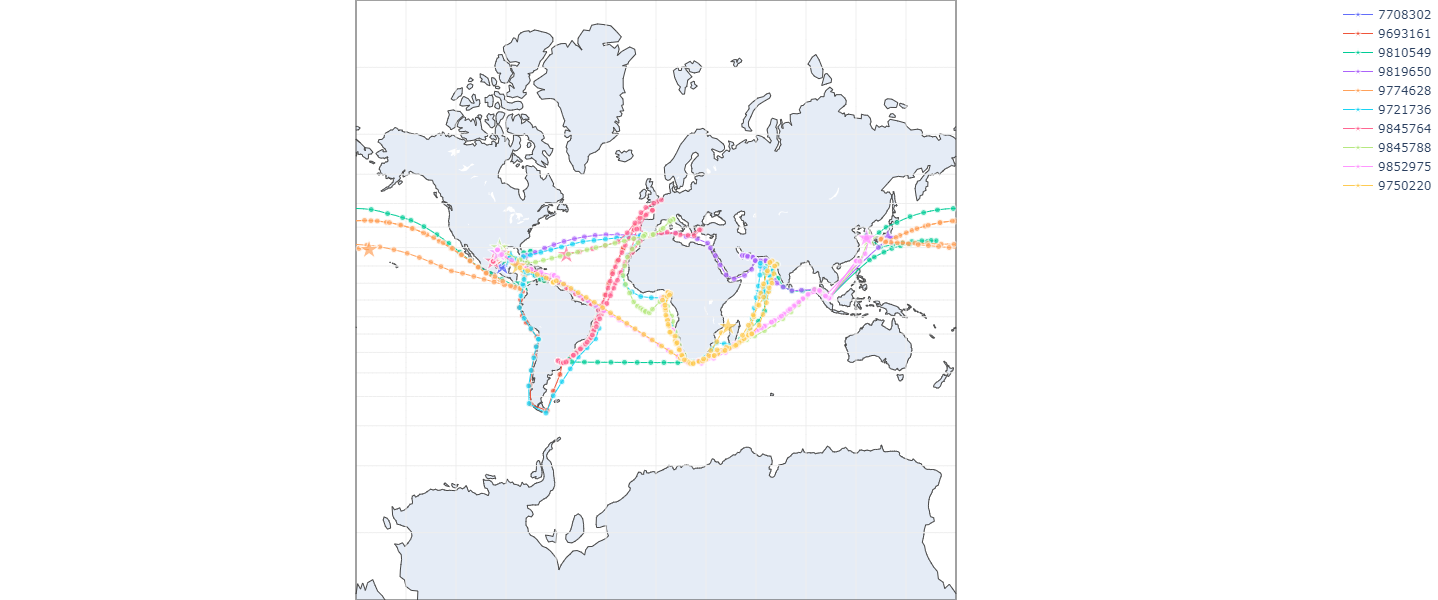

KeyError: 0

In [13]:
get_data(vessel_imo[0:10],'2020-05-15')[0]

# Interest Rates

"I am looking for repo rates. I want to group by Central Bank and show only 3 rates per Central Bank if applicable"

In [ ]:
rdp.search(
  view = rdp.SearchViews.IndicatorQuotes,
  query = "repo rate",
  #"Filter": "CentralBankName in ('Federal Reserve System' 'Bank of England')",
  group_by = "CentralBankName",
  group_count = 3,
  select = "CentralBankName,DocumentTitle,RIC,ObservationValue",
  top = 1000)

# Equities

"I'm looking for equity securities in the Personal & Household Products Industry that have an EPS greater than 6 and Market Cap greater than 100 million"

In [ ]:
rdp.search(
    view=rdp.SearchViews.EquityQuotes,
    filter = "Eps gt 6.0 and RCSTRBC2012Name eq 'Personal & Household Products & Services' " \
             "and MktCapTotalUsd gt 100000000 and IsPrimaryRIC eq true",
    top =  10000,
    select ="DocumentTitle , RIC, Eps, MktCapTotalUsd")

### Vessel Map Function

In [15]:
import refinitiv.dataplatform.legacy as ek
from datetime import datetime, timedelta
import dateutil
import math
import pandas as pd, numpy as np
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

ek.set_app_key('DEFAULT_CODE_BOOK_APP_KEY')
init_notebook_mode(connected=True)

data = pd.DataFrame()

class SingleVesselHelper:
    @classmethod
    def calculate(cls, df):
        """
        Takes a dataframe with columns:
        # DateTime or AIS Date Time - date when transponder data was received
        # Latitude - vessel latitude
        # Longitude - vessel longitude
        
        DataFrame must be sorted by DateTime column in descending order (latest records first)

        Returns a new dataframe with columns:
        # Dt.Prev, Dt.Next
        # Lat.Prev, Lat.Next
        # Lon.Prev, Lon.Next
        # Dist
        # Hours
        # AvgSpeed
        """
        
        # Creating differential dataset 
        diffs = cls.__make_diffs(df)
        
        # Calculating distances
        diffs['Distance'] = diffs.apply(
            lambda row: cls.__dist(row['Lon.Next'], row['Lat.Next'], row['Lon.Prev'], row['Lat.Prev']), 
            axis=1
        )
        
        # Calculating hours differences
        diffs['DiffHours'] = diffs.apply(
            lambda row: cls.__diff_hours(row['Dt.Next'], row['Dt.Prev']),
            axis=1
        )         
        
        # Calculating average speeds
        diffs['AvgSpeed'] = diffs['Distance']/diffs['DiffHours']
        
        return diffs
    
    @classmethod
    def __diff_hours(cls, next_dt, prev_dt):
        delta = next_dt - prev_dt
        return delta.days*24 + delta.seconds/3600
    
    @classmethod
    def __dist(cls, lon1, lat1, lon2, lat2):
        """
        Calculate the great circle distance between two points 
        on the earth (specified in decimal degrees)
        """
        # convert decimal degrees to radians 
        lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])

        # haversine formula 
        dlon = lon2 - lon1 
        dlat = lat2 - lat1 
        a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
        c = 2 * math.asin(math.sqrt(a)) 
        r = 6371 / 1.852 # Km -> nautical miles
        return c * r

    @classmethod
    def __make_diffs(cls, df):
        temp = pd.DataFrame(df)
        if not 'DateTime' in temp and not 'AIS Date Time' in temp:
            raise ValueError('No DateTime column in dataset')
        elif 'AIS Date Time' in temp:
            temp['DateTime'] = temp['AIS Date Time'].apply(dateutil.parser.parse)

        if not 'Latitude' in temp:
            raise ValueError('No Latitude column in dataset')
        if not 'Longitude' in temp:
            raise ValueError('No Longitude column in dataset')
        
        # Dropping all unnecessary columns
        cropped = temp[['DateTime', 'Latitude', 'Longitude']]
            
        # Creating shifted dataframes - current
        df_next = pd.DataFrame(cropped).iloc[:-1].reset_index()
        df_next.rename(columns={"DateTime": "Dt.Next", "Latitude": "Lat.Next", "Longitude": "Lon.Next"}, inplace=True)
        del df_next['index']
        
        # And previous        
        df_prev = pd.DataFrame(cropped).iloc[1:].reset_index()
        df_prev.rename(columns={"DateTime": "Dt.Prev", "Latitude": "Lat.Prev", "Longitude": "Lon.Prev"}, inplace=True)
        del df_prev['index']

        # And concatenating
        dataframe = pd.concat([df_next, df_prev], axis=1, join='inner')
        return dataframe
    
class MultipleVesselHelper:
    def load(self, vessel_ids, days, start_date):
        self.data, err = ek.get_data(
            vessel_ids, 
            ['TR.AssetLocationLatitude','TR.AssetLocationLongitude', 'TR.AssetDateTime'], 
            {"VDT":"True", "SDate":days, "EDate":start_date, "CH":"Fd", "RH":"IN"} # "0D", "2018-01-01"
        )
        self.data['Instrument'] = self.data['Instrument'].astype(str)
        self.data['DateTime'] = self.data['AIS Date Time'].apply(dateutil.parser.parse)
        self.__recalculate(vessel_ids)
        
    def __recalculate(self, vessel_ids):
        self.joined = {}
        for vessel_id in vessel_ids:
            df = self.data[self.data['Instrument'] == vessel_id]
            if df.empty:
                continue 
            calculated = SingleVesselHelper.calculate(df)
            self.joined[vessel_id] = calculated 
    
    def __get_map_points(self, vessel_id):
        joined = self.joined[vessel_id]
        data = self.data[self.data['Instrument'] == vessel_id]
        
        def get_labels():
            def make_label(row):
                if row is None:
                    return "Start"
                else:
                    vel = row['AvgSpeed'] if not math.isnan(row['AvgSpeed']) else 0
                    dist = row['Distance'] if not math.isnan(row['Distance']) else 0
                    return "{:%b, %d '%y} / {:2.2f}nm / {:2.2f}kn".format(row['Dt.Next'], dist, vel)            

            def handle_row(row):
                item = joined[joined['Dt.Next'] == row['DateTime']]
                if item.empty:
                    return None
                else:
                    return make_label(item.iloc[0])

            return data.apply(handle_row, axis=1)  

        def mark_first_and_last(count, first, last, others):
            array = [others] * count
            array[0] = first
            array[-1] = last
            return array

        return go.Scattergeo(
            lon = data['Longitude'],
            lat = data['Latitude'],
            hovertext = get_labels(),
            name = vessel_id,
            mode = 'lines+markers',
            marker = dict(
                size = mark_first_and_last(len(data), 15, 15, 6),
                symbol = mark_first_and_last(len(data), 'star', 'star', 0),
                line = dict(width = 1)
            ),
            line = go.scattergeo.Line(width = 1)
        )
    
    def plot(self, scope='asia'):
        points = []
        
        any_data = False
        
        for vessel_id in self.joined.keys():
            points.append(self.__get_map_points(vessel_id))
            any_data = True
            
        layout = dict(
            width =  900,
            height = 600,
            geo = dict(
                scope=scope,
                projection=dict(type='mercator'),
                lonaxis = dict(showgrid = True),
                lataxis = dict(showgrid = True)
            ),
            margin = dict(
                l = 0,
                r = 0,
                t = 0,
                b = 0
            )
        )
        
        if not any_data:
            print("No data to plot")
            return
        
        fig = dict(data=points, layout=layout)
        iplot(fig) 

def get_scopes():
    return ["world", "usa", "europe", "asia", "africa", "north america", "south america"]
        
def get_data(imo_list, start_date, geo_scope = 'world'):
    v = MultipleVesselHelper()
    v.load(imo_list, '0D', start_date)
    v.plot(geo_scope)
    return v.joined